In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import json
from utils import plot_recall_comparison
with open("/Users/egor/Documents/code/ml-email-search/quality_results.json", "r") as file:
    timings = json.load(file)


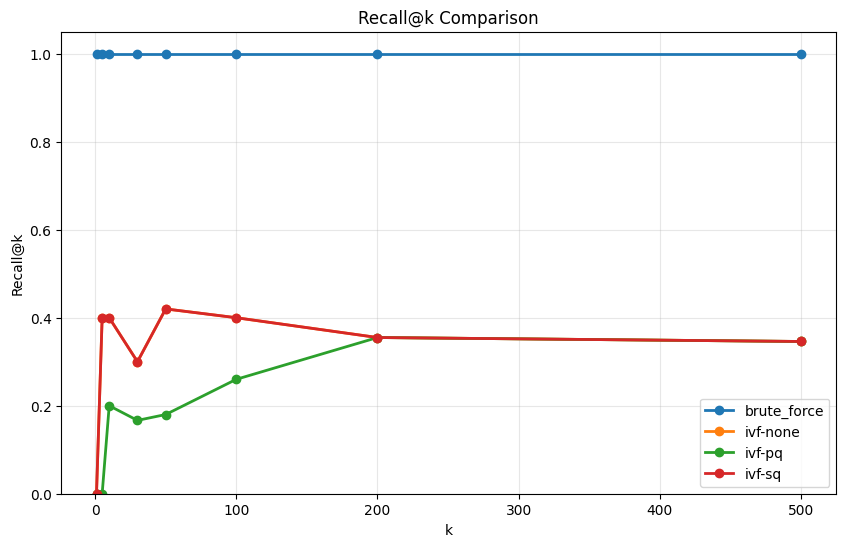

In [25]:
plot_recall_comparison(timings)